## Todo
### Load Data
### encode data

### make X_train , y_train ,X_cv , y_cv , y_test ,X_test

#### make the linear regression model fit(learn)

#### model evaluation learing curve , loss curve

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting the data to Train , Cv , Test Splits
from sklearn.linear_model import SGDRegressor #linear Regression with Gradient Descent
from sklearn.metrics import mean_squared_error,accuracy_score #for learn and loss curves

import gradio as gr
df= pd.read_csv(r"C:\Users\jaken\Documents\student_predictor\dataset\Student_Performance.csv")
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [2]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'No':0,'Yes':1})
df.head() #fix the 'Extracurricular Activities' Column

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [3]:
#Train 60% , Cross Validate 20% , Test 20%

#extract the input features and output labels
inputs = df.drop("Performance Index",axis=1)
outputs = df.drop(['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced'],axis=1)

#change the X and Y to suitable forms
# X_train (ndarray(m examples, n features))
# y_train (ndarray(m output labels))
X = inputs.to_numpy()
y= outputs.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2



In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_val = y_val.flatten()  #change all the Ys to (n_samples,) shape

In [5]:
sgd = SGDRegressor(max_iter=1000,loss='squared_error')
sgd.fit(X_train,y_train) #Train linear regression model with stochastic gradient decent with squared error

print(f"The Model Parameter: Weights: {sgd.coef_} and the bias is {sgd.intercept_}")

The Model Parameter: Weights: [-7.48286950e+08 -1.46655158e+08 -1.49711945e+09 -1.98137433e+09
 -1.42079391e+08] and the bias is [-1.04754191e+10]


In [6]:
y_pred_train = sgd.predict(X_train)
y_pred_cv = sgd.predict(X_val)


In [7]:
mse_train = mean_squared_error(y_train,y_pred_train)/2
mse_cv = mean_squared_error(y_val,y_pred_cv)/2

## Plots model eval

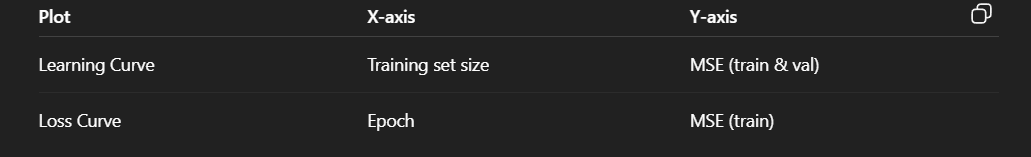

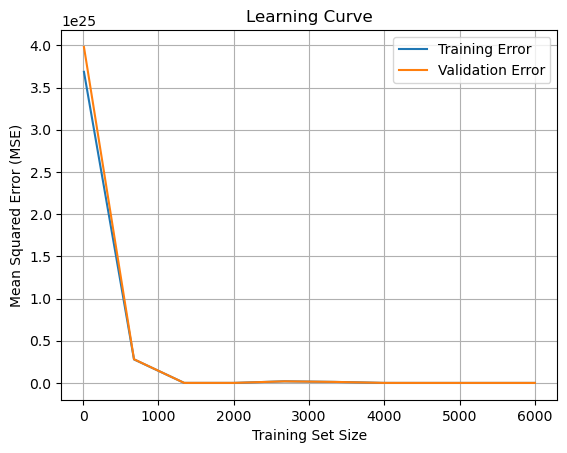

In [8]:
#learning curve

# X_train has 6000 samples, X_val has 2000
train_errors = []
val_errors = []
train_sizes = np.linspace(10, 6000, 10, dtype=int)  # 10 points: from 10 to 6000 means at every iteratin the size of X_train and Y_train Increases by 10 examples

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    model = SGDRegressor(max_iter=1000, tol=1e-3,random_state=5)
    model.fit(X_subset, y_subset) #fit the model on training data

    y_subset_pred = model.predict(X_subset) #make prediction on the training data
    y_val_pred = model.predict(X_val)#make prediction on cross validation set

    train_errors.append(mean_squared_error(y_subset, y_subset_pred)) #loss on train set
    val_errors.append(mean_squared_error(y_val, y_val_pred))#loss on cross validation

# Plot
plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, val_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


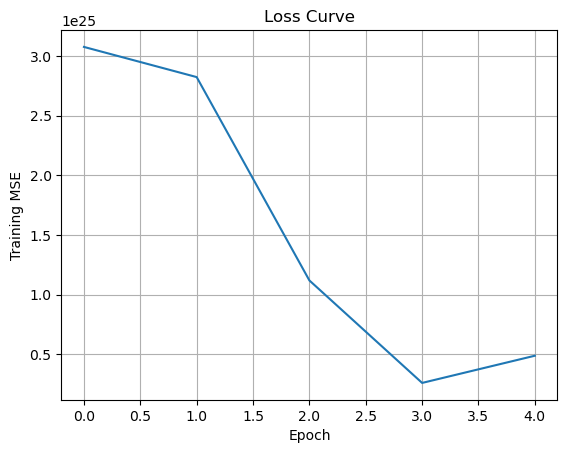

In [9]:
#loss curve

model = SGDRegressor(max_iter=100, warm_start=True, learning_rate='constant', eta0=0.001,random_state=5)
n_epochs = 5
losses = []

for epoch in range(n_epochs):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    loss = mean_squared_error(y_train, y_train_pred)
    losses.append(loss)

# Plot
plt.plot(range(n_epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Training MSE")
plt.title("Loss Curve")
plt.grid(True)
plt.show()
